### it doesn't work, there is NAN, I don't know why
### Idea
- to solve polynomial problem (eg x^3)
- Why each layer have to be linear
- Tayler series can solve this? >>> focus attention

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/Users/epinyoanun/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


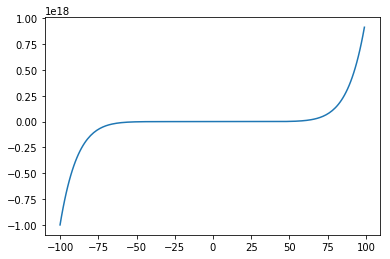

In [322]:
x1 = np.arange(-100,100)
y = np.power(x1, 9) - 5

# x1 = np.linspace(-10, 10, 200)
# y = 1 / (1 + np.exp(-x1)) + .5

plt.plot(x1,y)

### 1. Train

In [308]:
tf.reset_default_graph()
def get_scope_variable(scope, name, shape=None):
    with tf.variable_scope(scope, reuse=tf.AUTO_REUSE):
        v = tf.get_variable(name, shape, initializer=tf.contrib.layers.xavier_initializer())
    return v

def get_scope_variable_pow(scope, name, shape=None):
#     return tf.constant(1.0, shape=shape)
    with tf.variable_scope(scope, reuse=tf.AUTO_REUSE):
        v = tf.get_variable(name, initializer=tf.ones(shape))
    return v

def normal_full_layer(input_layer, size, scope):
    input_size = int(input_layer.get_shape()[1])
    W = get_scope_variable(scope, name='w', shape=[input_size, size])
    b = get_scope_variable(scope, name='b', shape=[size])
    power = get_scope_variable_pow(scope, name='power', shape=[200, input_size])
    input_layer_power = tf.pow(input_layer, power)
    return (tf.matmul(input_layer_power, W) + b), {'W':W, 'b':b, 'power':power}

tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, 1], name="x")

z, value = normal_full_layer(x, 2, 'layer1')
layer = tf.nn.relu(z)
y_pred, y_value = normal_full_layer(layer, 1, 'layer6')
y_true = tf.placeholder(tf.float32, shape=[None, 1], name="y_true")

error = tf.reduce_sum( tf.square(y_pred - y_true) )
optimizer = tf.train.AdamOptimizer(learning_rate=0.1) # need to change to Adam (or RMSprops)
train = optimizer.minimize(error)

# Session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

steps = 1000
for i in range(steps):
    _, error_val, _value, _y_value = sess.run([train, error, value, y_value], feed_dict={
                                              x:x1.reshape([-1,1]), 
                                              y_true:y.reshape([-1,1])
                                          })
    print('Current Step: {} '.format(i+1), 'error:', error_val, '_value:', 
          _value['power'][0], 
          '_y_value:',_y_value['power'][0])


Current Step: 1  error: 1.0556302e+37 _value: [1.] _y_value: [ 1. nan]
Current Step: 2  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 3  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 4  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 5  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 6  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 7  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 8  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 9  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 10  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 11  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 12  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 13  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 14  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 15  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 16  error: nan _value: [nan] _y_value: [n

Current Step: 170  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 171  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 172  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 173  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 174  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 175  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 176  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 177  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 178  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 179  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 180  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 181  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 182  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 183  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 184  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 185  error: nan _value: [n

Current Step: 424  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 425  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 426  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 427  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 428  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 429  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 430  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 431  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 432  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 433  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 434  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 435  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 436  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 437  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 438  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 439  error: nan _value: [n

Current Step: 618  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 619  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 620  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 621  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 622  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 623  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 624  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 625  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 626  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 627  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 628  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 629  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 630  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 631  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 632  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 633  error: nan _value: [n

Current Step: 835  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 836  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 837  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 838  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 839  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 840  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 841  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 842  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 843  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 844  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 845  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 846  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 847  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 848  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 849  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 850  error: nan _value: [n

Current Step: 971  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 972  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 973  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 974  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 975  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 976  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 977  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 978  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 979  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 980  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 981  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 982  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 983  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 984  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 985  error: nan _value: [nan] _y_value: [nan nan]
Current Step: 986  error: nan _value: [n

### 2. Predict & Plot

In [286]:
y_pred_val = sess.run([y_pred], feed_dict={ x:x1.reshape([-1,1]) })
y_pred_val = np.array(y_pred_val).reshape((200))

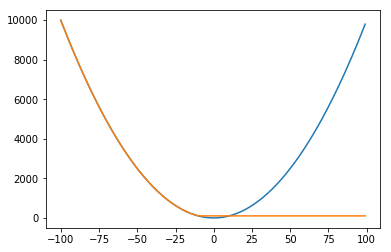

In [287]:
plt.plot(x1,y)
plt.plot(x1,y_pred_val)